# Observed Taylor law: variance vs mean 
**in protein length distributions for the different species (reference proteomes)**

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
#
from plotnine import *
if 1:
    import warnings
    warnings.filterwarnings('ignore')
import sys
sys.path.append('../lib/')
import constants as c

## The protein length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# statistics on length distribution for different species 
stat_file = c.STAT_P_FILE
print("The statistical descriptions of the protein distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["superregnum", "species", "proteome_id", "count", "mean", "var", "division_both_dbs"]]
stat_df.rename(columns = {"division_both_dbs": 'Group of organisms',
                          "superregnum": "Three-domain system"}, inplace = True)
# visualize data
if 1:
    pd.set_option('display.max_columns', None)
    display(stat_df.head(2))
    print(stat_df.shape)
    print(stat_df["Three-domain system"].value_counts(), "\n")
    print(stat_df["Group of organisms"].value_counts())

The statistical descriptions of the protein distributions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/main_work/../lib/../main_tables/stat_proteins.tsv 



,Three-domain system,species,proteome_id,count,mean,var,Group of organisms
0,archaea,Halorubrum saccharovorum,UP000053331,2334.0,250.641817,28808.608041,archaea
1,archaea,Pyrodictium occultum,UP000053352,1602.0,285.092385,34816.348736,archaea


(9913, 7)
Three-domain system
bacteria     7997
eukaryota    1586
archaea       330
Name: count, dtype: int64 

Group of organisms
bacteria         7997
fungi             772
archaea           330
vertebrates       248
invertebrates     226
plants            184
protists          156
Name: count, dtype: int64


## Python functions

In [3]:
# FUNCTIONS
###########
def plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, legend): 

    # Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    # Format the regression text
    print('v = {:4.4} * m^{:4.4};   R^2= {:2.4f}'.format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + '\t \mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    # limits and tick-breaks
    x_limits=[min(df2plot[col_x].to_list())/1.3, 1.3*max(df2plot[col_x].to_list())]
    y_limits=[min(df2plot[col_y].to_list())/1.3, 1.3*max(df2plot[col_y].to_list())]
    x_text_factor = 0.085
    y_text_factor = 0.95

    palette_colors = c.COLOR_ORG_GROUPS
    if legend == "Three-domain system":
        palette_colors = c.COLOR_KINGDOMS
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1)
        + geom_smooth(method="lm", color="green", size=0.25, span=.8)
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=palette_colors) # + scale_color_brewer() '#5C2D91'
        + labs(color=legend) # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(2, 4)], limits=x_limits) #, labels=scientific_format(digits=2)
        + scale_y_log10(breaks = [10**power for power in range(3, 7)], limits=y_limits)
    ) + theme(legend_position=(0.7,0.2), legend_key_size=5, 
              legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=x_text_factor*max(df2plot[col_x].to_list()), y=y_text_factor*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
### by kingdom
$\sigma^{2}$ is the variance   
$\mu$ is the mean 

In [4]:

df2plot = stat_df.copy()
df2plot.rename(columns = {"mean" : 'prots_mean', 
                          "var" : 'prots_var'}, inplace = True)

col_x = "prots_mean"
col_y = "prots_var"
df2plot = df2plot[["Three-domain system", "Group of organisms", col_x, col_y]]
print(df2plot.shape)
title = "Protein length (reference proteomes)"
x_lab = "Mean protein length (aa)"
y_lab = "Protein length variance"
bool_show_regression = True

(9913, 4)


v = 0.01681 * m^2.605;   R^2= 0.7338


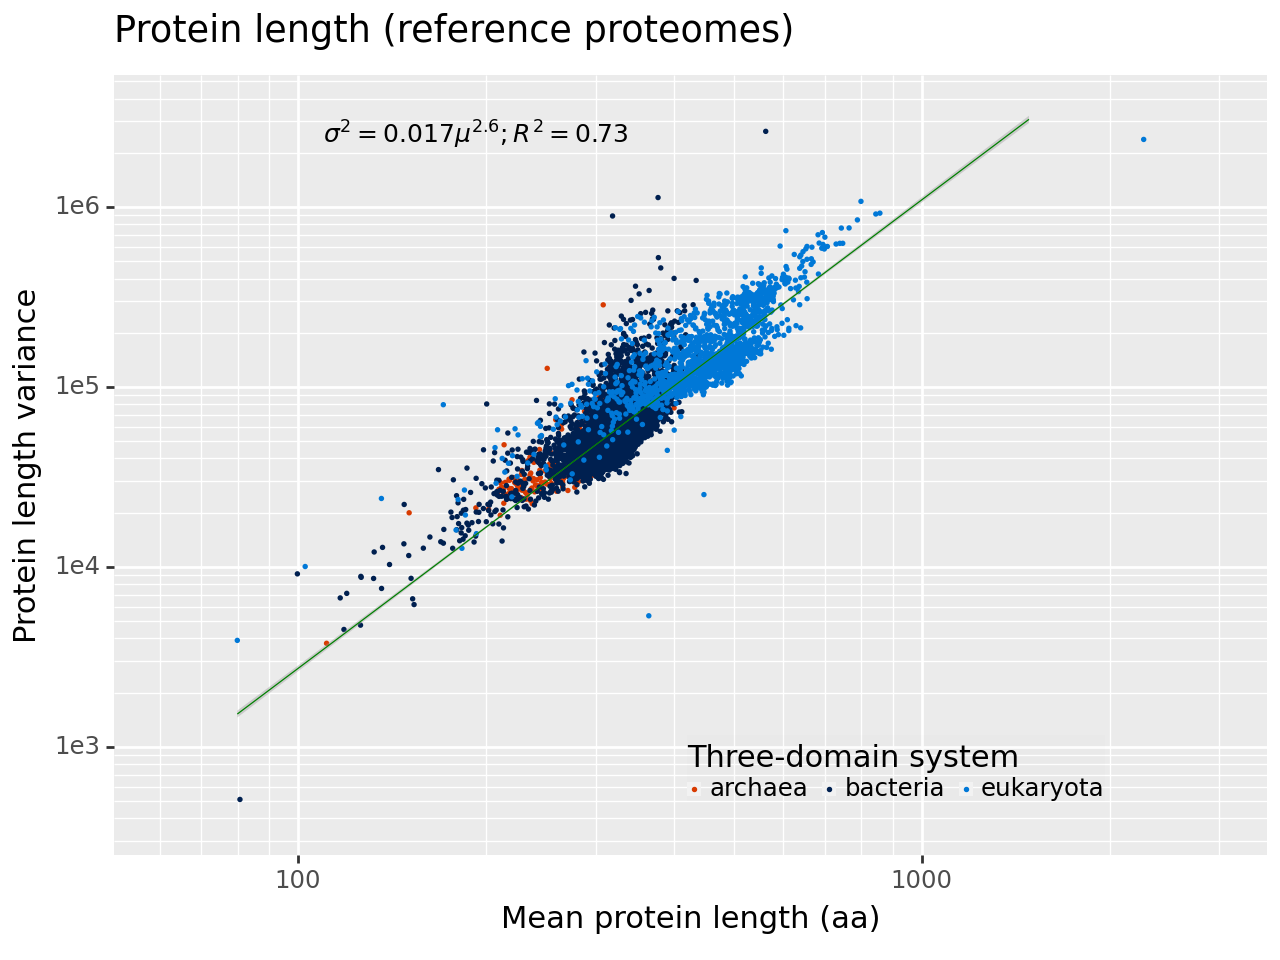

In [5]:
legends_by = "Three-domain system"

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                categories=c.ORG_KINGDOMS,
                                ordered=True)
df2plot.sort_values(legends_by, inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, legends_by)

### by group of organisms

(9913, 4)
Group of organisms
bacteria         7997
fungi             772
archaea           330
vertebrates       248
invertebrates     226
plants            184
protists          156
Name: count, dtype: int64
v = 0.01681 * m^2.605;   R^2= 0.7338


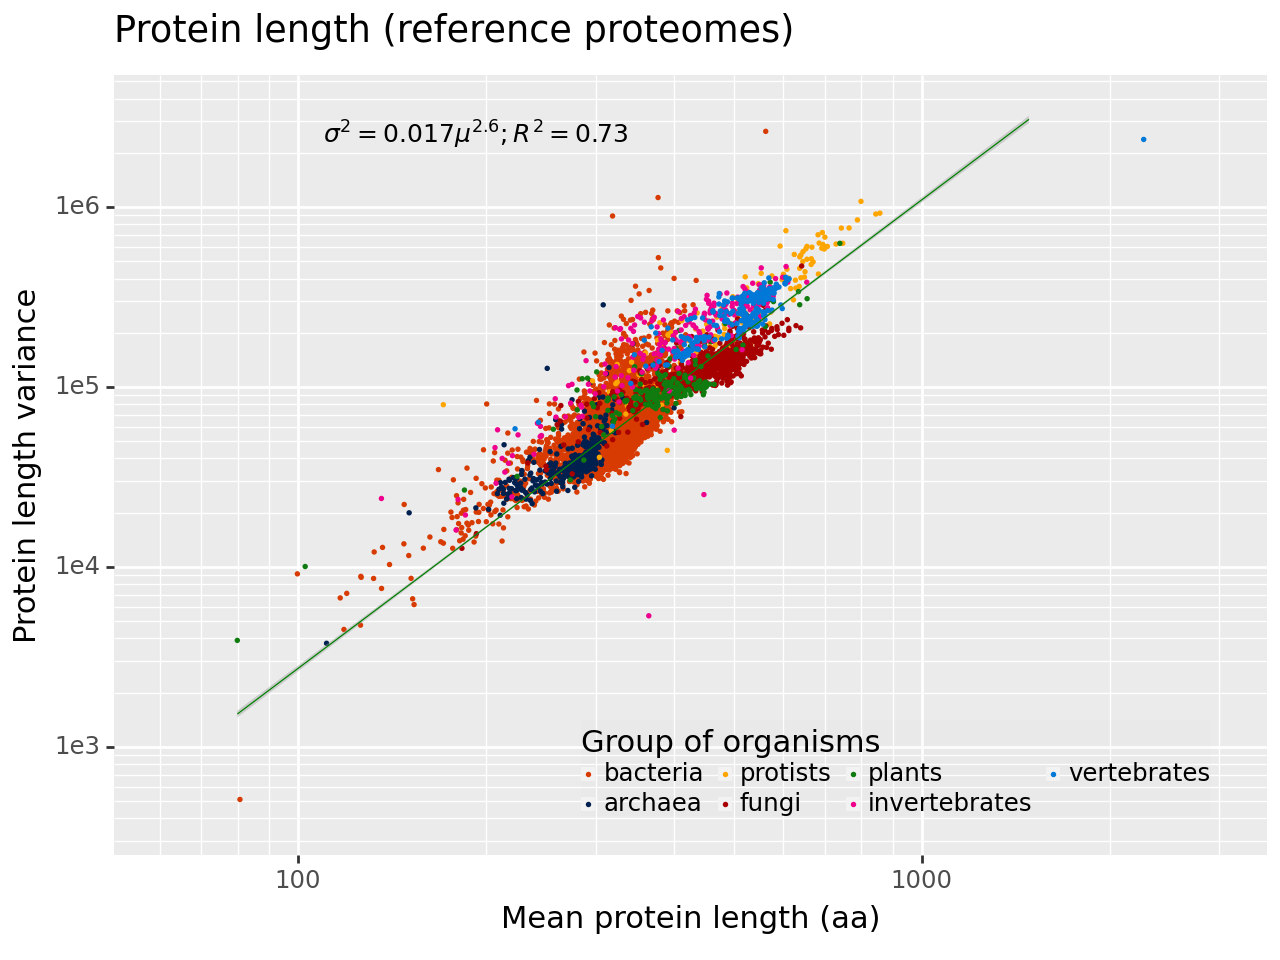

In [6]:
legends_by = "Group of organisms"
print(df2plot.shape)

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                    categories=c.ORG_GROUPS,
                                    ordered=True)
df2plot.sort_values(legends_by, inplace=True)

# visualize data
if 1:
    print(stat_df["Group of organisms"].value_counts())
plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, legends_by)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $